# Gramener Case Study


# Business Objectives

Work for a consumer finance company: This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.

Aim is to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss.




# Importing Packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, date
import datetime as dt
import os

# Importing Data:

In [2]:
loan = pd.read_csv("C:/Users/Karthik Bhat/Documents/PGDDS/Case Project/Gramener/loan.csv", low_memory=False)

In [3]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
loan.shape

(39717, 111)

# Dealing with missing value:

In [6]:
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [7]:
round(100*(loan.isnull().sum()/len(loan.index)), 2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [8]:
loan_1 = loan.dropna(axis=1, how='all',inplace=False) #Dropping column with all NULL values

In [9]:
loan_1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [10]:
round(100*(loan_1.isnull().sum()/len(loan_1.index)), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [11]:
loan_1.loc[loan_1['emp_title'].isnull(),'emp_title'] = 'NA'

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [12]:
loan_1.loc[loan_1['emp_length'].isnull(),'emp_length'] = 'NA'

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [13]:
loan_1.loc[loan_1['desc'].isnull(),'desc'] = 'NA'

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
loan_1.loc[loan_1['title'].isnull(),'title'] = 'NA'

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [15]:
round(loan_1.isnull().sum()/len(loan_1.index)*100,2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      0.00
emp_length                     0.00
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                           0.00
purpose                        0.00
title                          0.00
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [16]:
loan_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     39717 non-null object
emp_length                    39717 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

# Generic Steps to perform Data Cleaning before predivictive Modeling

In [17]:
loan_2 = loan_1.drop(['mths_since_last_record','tax_liens','chargeoff_within_12_mths','delinq_amnt','acc_now_delinq','application_type','policy_code','collections_12_mths_ex_med','initial_list_status'],axis=1)

In [18]:
loan_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
id                         39717 non-null int64
member_id                  39717 non-null int64
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null object
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_title                  39717 non-null object
emp_length                 39717 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null object
loan_status                39717 non-null object
pymnt_plan                 39717 non-null object
url       

In [19]:
# Loan Set excluding the Current Status
loan_3 = loan_2[loan_2.loan_status != "Current"]

In [20]:
#dropping the next_payment column which is irrevelant for furthere analysis
loan_3 = loan_3.drop('next_pymnt_d',inplace=False,axis=1)

In [21]:
loan_3.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


In [22]:
loan_3 = loan_3[~loan_3['revol_util'].isnull()]

In [23]:
#Printing the amount of credit the borrower is using relative to all available revolving credit.
print((loan_3['revol_util']).head(5))

0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object


In [24]:
#Assigning the null values of public bankrupties to 0
loan_3.loc[loan_3['pub_rec_bankruptcies'].isnull(),'pub_rec_bankruptcies']=0

In [28]:
#imputing months since last delq as 0 with ref to delinq_2yrs
loan_3.loc[loan_3['mths_since_last_delinq'].isnull(),'mths_since_last_delinq']=0 

In [25]:
#loan_3['id'] = loan_3['id'].astype(str) #Converting id to string
#loan_3['member_id'] = loan_3['member_id'].astype(str) #converting id to string
loan_3["int_rate"] = loan_3["int_rate"].str.rstrip('%') #stripping % sign from interest rate
loan_3["int_rate"] = loan_3["int_rate"].astype(float) #Converting Interest Rate to float from String
loan_3["revol_util"] = loan_3["revol_util"].str.rstrip('%') #stripping % sign from revolving utilization
loan_3["revol_util"] = loan_3["revol_util"].astype(float) #Converting revolving utilization to float from String
loan_3.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
url                         object
desc                        object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
mths_since_last_deli

In [26]:
loan_3["emp_length"] = loan_3["emp_length"].astype(str) #Converting emp_length column datatype to String
loan_3["annual_inc"] = loan_3["annual_inc"].astype(float) #Converting annual income column to float datatype from string

In [27]:
#Removing Months word from term and converting it to integer datatype
loan_3["term"] = loan_3["term"].str.rstrip('months')
loan_3["term"] = loan_3["term"].astype(int)

In [28]:
loan_4 = loan_3.copy()

In [29]:
# Converting to date in standard pormat
loan_4['last_pymnt_d'] = pd.to_datetime(loan_4['last_pymnt_d'],format='%b-%y')
loan_4['issue_d'] = pd.to_datetime(loan_4['issue_d'],format='%b-%y')
loan_4['earliest_cr_line'] = pd.to_datetime(loan_4['earliest_cr_line'],format='%b-%y')
loan_4['last_credit_pull_d'] = pd.to_datetime(loan_4['last_credit_pull_d'],format='%b-%y')

In [30]:
loan_4['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [31]:
loan_4['year'] =loan_4['issue_d'].dt.year

In [32]:
# creating Slabs based on Interest Rates for Loans
def InterestRateSlabs(IR):
    'divide Interest Rates into 3 categories'
    if IR <= 10:
        return "Low"
    elif 10 < IR <= 18:
        return "Medium"
    elif IR > 18:
        return "High"
    
loan_4["Interest_Rates_Slab"] = loan_4.int_rate.apply(lambda IR: InterestRateSlabs(IR))

In [33]:
# creating slabs based on Employee Experience
def Slabs(Expr:str):
    'divide Employee Experience into 4 categories'
    if Expr in ("< 1 year"):
        return "Trainee"
    elif Expr in ("1 year", "2 years", "3 years", "4 years"):
        return "Junior"
    elif Expr in ("5 years", "6 years", "7 years", "8 years"):
        return "Mid-Level"
    elif Expr in ("9 years", "10+ years"):
        return "Senior"
    else:
        return "NA"
    
loan_4["Emp_Exp_Slab"] = loan_4.emp_length.apply(lambda Expr: Slabs(Expr))

Emp_Exp_Slab  loan_status
Junior        Charged Off     1581
              Fully Paid     10048
Mid-Level     Charged Off     1227
              Fully Paid      7269
NA            Charged Off      227
              Fully Paid       803
Senior        Charged Off     1488
              Fully Paid      8225
Trainee       Charged Off     1088
              Fully Paid      6571
Name: id, dtype: int64


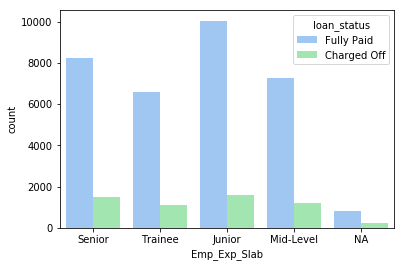

In [34]:
print(loan_4.groupby(['Emp_Exp_Slab','loan_status'])['id'].agg('count'))
sns.countplot(x="Emp_Exp_Slab", hue="loan_status", data = loan_4,palette="pastel")

Interest_Rates_Slab  loan_status
High                 Charged Off      731
                     Fully Paid      1502
Low                  Charged Off      830
                     Fully Paid     11486
Medium               Charged Off     4050
                     Fully Paid     19928
Name: id, dtype: int64


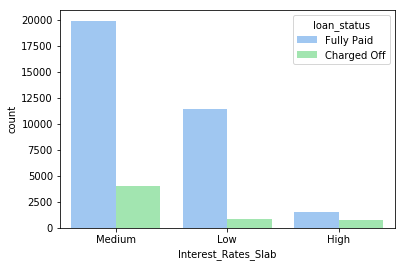

In [35]:
print(loan_4.groupby(['Interest_Rates_Slab','loan_status'])['id'].agg('count'))
sns.countplot(x="Interest_Rates_Slab", hue="loan_status", data = loan_4,palette="pastel")

home_ownership  loan_status
MORTGAGE        Charged Off     2323
                Fully Paid     14687
NONE            Fully Paid         3
OTHER           Charged Off       18
                Fully Paid        78
OWN             Charged Off      441
                Fully Paid      2529
RENT            Charged Off     2829
                Fully Paid     15619
Name: id, dtype: int64


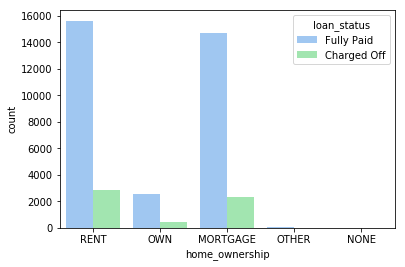

In [36]:
print(loan_4.groupby(['home_ownership','loan_status'])['id'].agg('count'))
sns.countplot(x="home_ownership", hue="loan_status", data = loan_4,palette="pastel")

purpose             loan_status
car                 Charged Off      159
                    Fully Paid      1338
credit_card         Charged Off      541
                    Fully Paid      4484
debt_consolidation  Charged Off     2762
                    Fully Paid     15281
educational         Charged Off       56
                    Fully Paid       266
home_improvement    Charged Off      344
                    Fully Paid      2526
house               Charged Off       59
                    Fully Paid       308
major_purchase      Charged Off      221
                    Fully Paid      1923
medical             Charged Off      105
                    Fully Paid       574
moving              Charged Off       92
                    Fully Paid       482
other               Charged Off      629
                    Fully Paid      3223
renewable_energy    Charged Off       19
                    Fully Paid        83
small_business      Charged Off      475
                    Fully

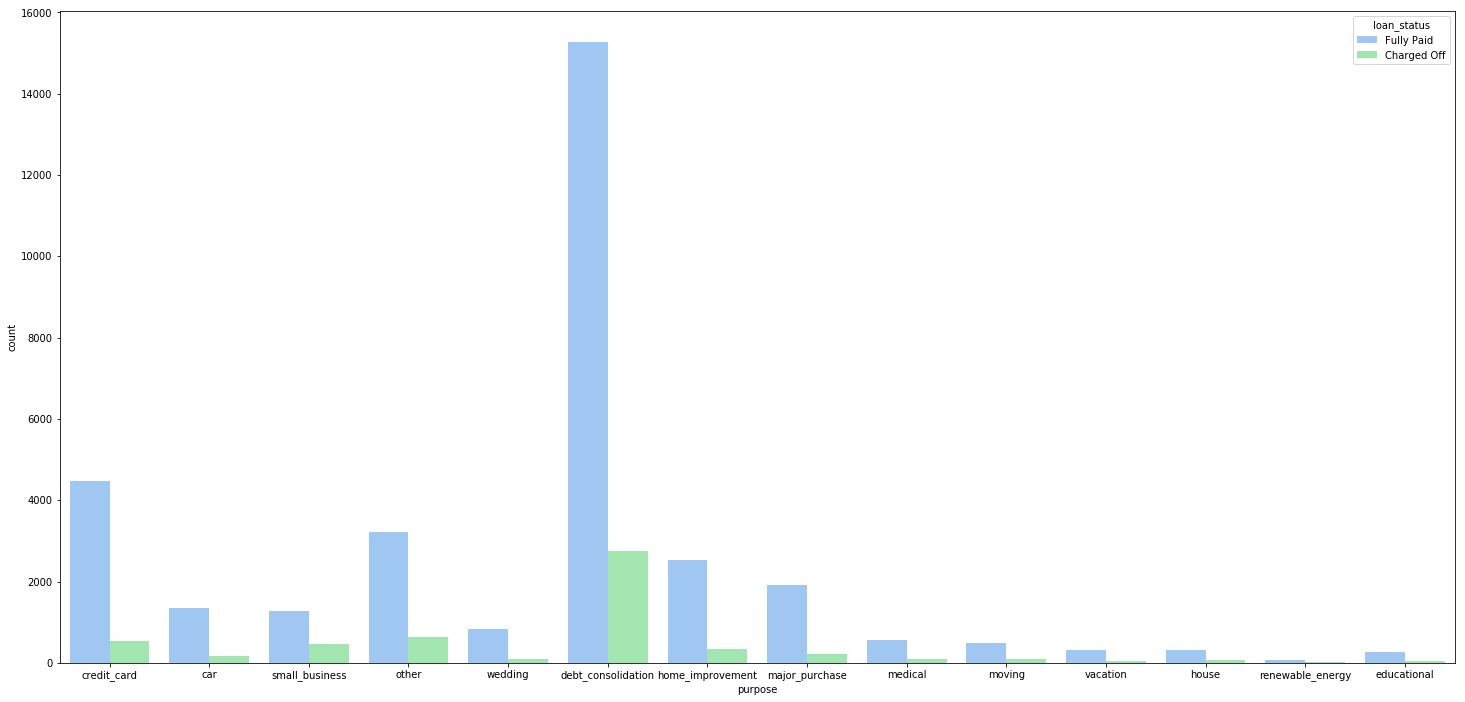

In [37]:
print(loan_4.groupby(['purpose','loan_status'])['id'].agg('count'))
plt.figure(figsize=(25,12))
sns.countplot(x="purpose", hue="loan_status", data = loan_4,palette="pastel")

In [38]:
not_good_loan = ["Charged Off"]

loan['loan_condition'] = np.nan

def loan_condition(status):
    if status in not_good_loan:
        return 'Not_Good_Loan'
    else:
        return 'Good_Loan'
    
    
loan_4['loan_condition'] = loan_4['loan_status'].apply(loan_condition)

In [39]:
loan_4.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies', 'year',
       'Interest_Rates_Slab', 'Emp_Exp_Slab', 'loan_condition'],
      dtype='object')

In [40]:
loan_4.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,year,Interest_Rates_Slab,Emp_Exp_Slab,loan_condition
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,2011,Medium,Senior,Good_Loan
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,2011,Medium,Trainee,Not_Good_Loan
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,2011,Medium,Senior,Good_Loan
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,2011,Medium,Senior,Good_Loan
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,2011,Low,Junior,Good_Loan


In [41]:
loan_amount = loan_4["loan_amnt"].values

In [42]:
funded_amount = loan_4["funded_amnt"].values

In [43]:
year = loan_4["year"].values

Text(0.5,1,'Amount Funded by the Lender')

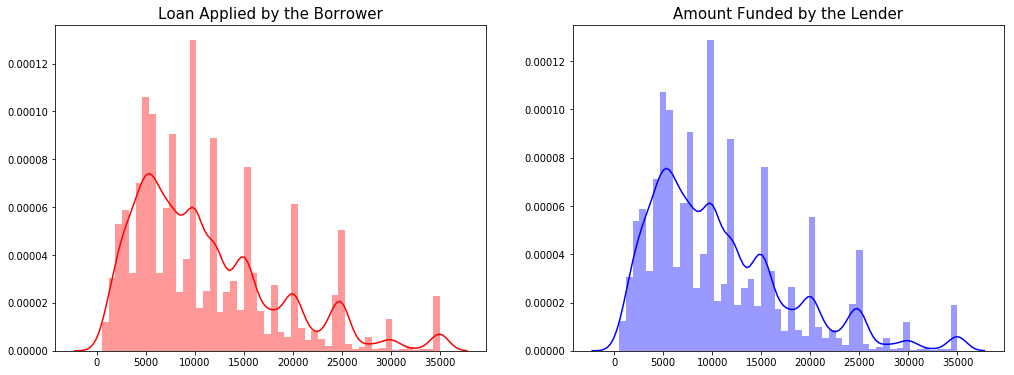

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(17,6))

sns.distplot(loan_amount, ax=ax[0], color="RED")
ax[0].set_title("Loan Applied by the Borrower", fontsize=15)
sns.distplot(funded_amount, ax=ax[1], color="BLUE")
ax[1].set_title("Amount Funded by the Lender", fontsize=15)

Text(0,0.5,'Average loan amount issued')

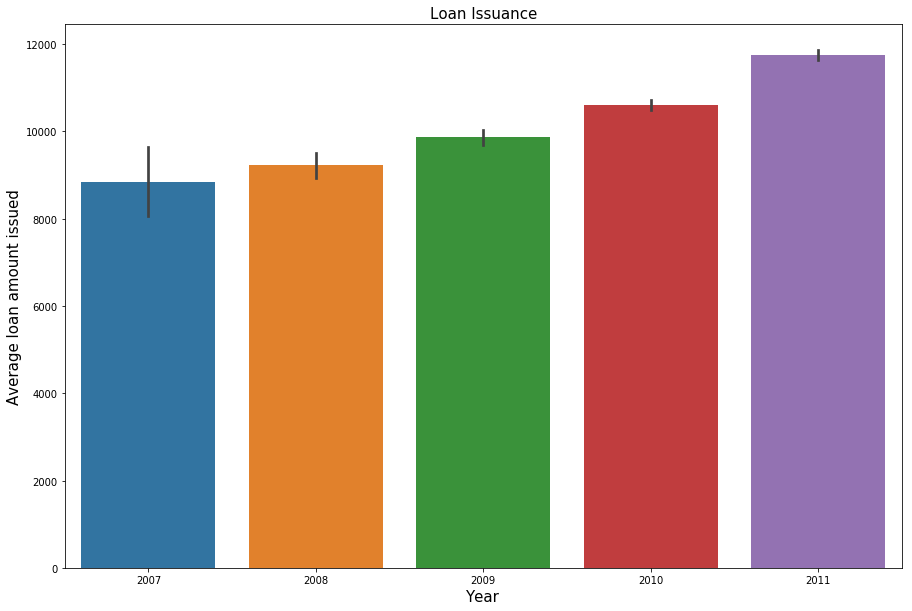

In [45]:
plt.figure(figsize=(15,10))
sns.barplot('year', 'loan_amnt', data=loan_4, palette='tab10')
plt.title('Loan Issuance', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average loan amount issued', fontsize=15)

[Text(0,0.5,'(%)')]

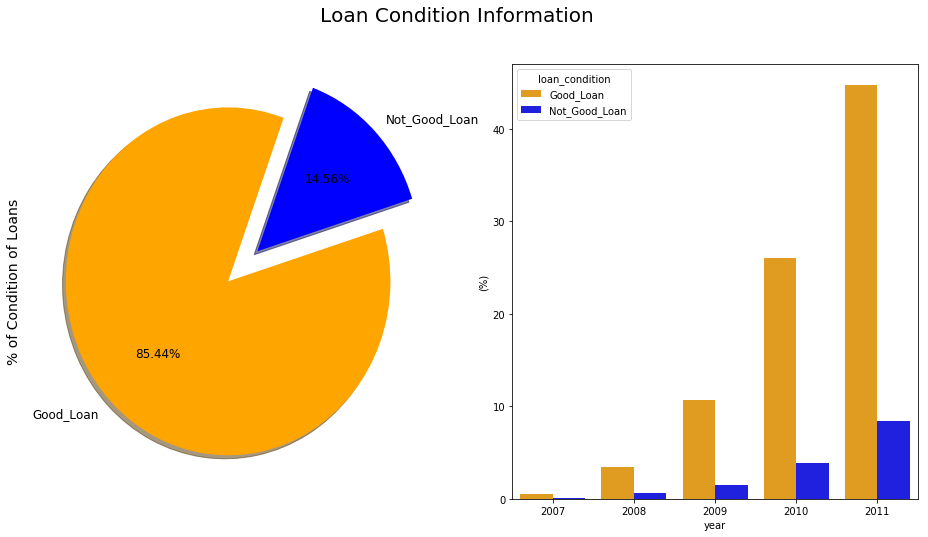

In [46]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["ORANGE", "BLUE"]
labels ="Good_Loan", "Not_Good_Loan"

plt.suptitle('Loan Condition Information', fontsize=20)

loan_4["loan_condition"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)

ax[0].set_ylabel('% of Condition of Loans', fontsize=14)
palette = ["ORANGE", "BLUE"]

sns.barplot(x="year", y="loan_amnt", hue="loan_condition", data=loan_4, palette=palette, estimator=lambda x: len(x) / len(loan_4) * 100)
ax[1].set(ylabel="(%)")


In [47]:
loan_4['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT', 'FL',
       'NY', 'PA', 'MN', 'NJ', 'OR', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'NV', 'AK', 'CO', 'MD', 'WV', 'VT', 'MI', 'DC',
       'SD', 'NH', 'AR', 'NM', 'KS', 'HI', 'OK', 'MT', 'WY', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [48]:
#List of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

In [49]:
loan['region'] = np.nan

def the_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'

loan_4['region'] = loan_4['addr_state'].apply(the_regions)

In [50]:
loan['region'] = np.nan

def the_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'

loan['region'] = loan['addr_state'].apply(the_regions)

In [82]:
# creating Slabs based on Month since last delq:
def MonthSlabs(MN):
    'divide Month since last delq into 5 categories on number of months'
    if 0 <= MN < 6:
        return "Recent"
    elif 6 <= MN < 12:
        return "12Month"
    elif 12 <= MN <= 24:
        return "2Year"
    elif MN > 24:
        return "Old"
    else:
        return "No record"
    
loan_4["last_delinq_slab"] = loan_4.mths_since_last_delinq.apply(lambda MN: MonthSlabs(MN))

In [89]:
# creating Slabs based on Revol utilisation:
def RevUtSlabs(UT):
    'divide Utilisation into 4 categories'
    if 0 <= UT < 25:
        return "Low"
    elif 25 <= UT < 50:
        return "Medium"
    elif 50 <= UT <= 75:
        return "High"
    else:
        return "Very High"
    
loan_4["revol_util_slab"] = loan_4.revol_util.apply(lambda UT: RevUtSlabs(UT))

In [94]:
# creating Slabs based on Number of queries in last 6 months:
def RevUtSlabs(QU):
    'divide Interest Rates into 4 categories'
    if 0 <= QU < 3:
        return "Low"
    elif 3 <= QU < 5:
        return "Medium"
    elif 5 <= QU <= 6:
        return "High"
    else:
        return "Very High"
    
loan_4["inq_slab"] = loan_4.inq_last_6mths.apply(lambda QU: RevUtSlabs(QU))

In [51]:
loan_4['complete_date'] = pd.to_datetime(loan_4['issue_d'])

In [52]:
group_dates = loan_4.groupby(['complete_date', 'region'], as_index=False).sum()

In [53]:
group_dates['issue_d'] = [month.to_period('M') for 
                          month in group_dates['complete_date']]

In [54]:
group_dates = group_dates.groupby(['issue_d', 'region'], as_index=False).sum()

In [55]:
group_dates['loan_amnt'] = group_dates['loan_amnt']/1000


In [56]:
loan_dates = pd.DataFrame(data=group_dates[['issue_d','region','loan_amnt']])

Text(0.5,1,'Loans issued by Region')

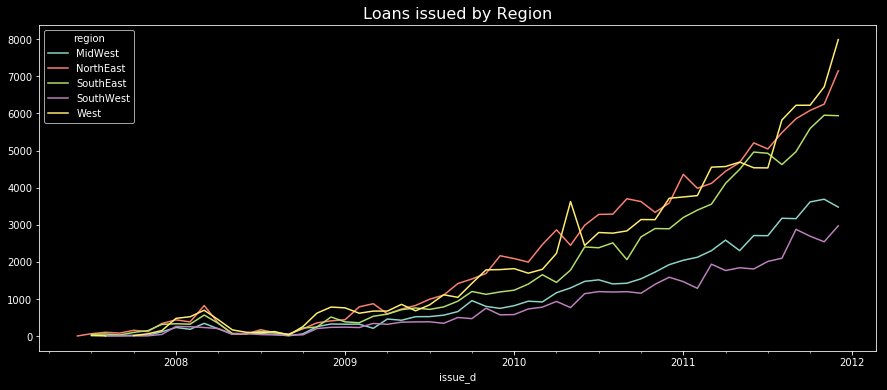

In [57]:
plt.style.use('dark_background')
cmap = plt.cm.Set3

by_issued_amount = loan_dates.groupby(['issue_d', 'region']).loan_amnt.sum()
by_issued_amount.unstack().plot(stacked=False, colormap=cmap, grid=False, legend=True, figsize=(15,6))

plt.title('Loans issued by Region', fontsize=16)

home_ownership  loan_status  loan_amnt
MORTGAGE        Charged Off  1000         10
                             1050          1
                             1100          1
                             1200          6
                             1275          1
                             1375          1
                             1400          4
                             1450          1
                             1500          9
                             1550          2
                             1600          1
                             1625          1
                             1675          1
                             1700          2
                             1750          1
                             1800          4
                             1950          1
                             2000         18
                             2050          1
                             2100          5
                             2125          1
                

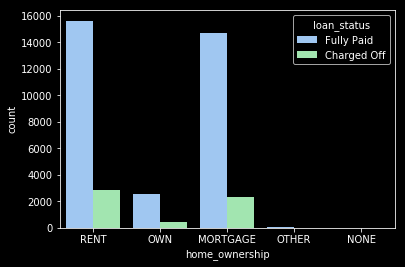

In [58]:
print(loan_4.groupby(['home_ownership','loan_status','loan_amnt'])['id'].agg('count'))
sns.countplot(x="home_ownership", hue="loan_status", data = loan_4,palette="pastel")

In [59]:
loan_4.shape

(38527, 53)

In [60]:
Avg_Amout_loan = loan_4['loan_amnt'].sum()/38527
print(Avg_Amout_loan)

11055.265138733876


home_ownership  loan_status  loan_amnt
MORTGAGE        Charged Off  1000         10
                             1050          1
                             1100          1
                             1200          6
                             1275          1
                             1375          1
                             1400          4
                             1450          1
                             1500          9
                             1550          2
                             1600          1
                             1625          1
                             1675          1
                             1700          2
                             1750          1
                             1800          4
                             1950          1
                             2000         18
                             2050          1
                             2100          5
                             2125          1
                

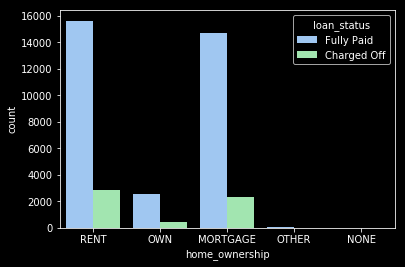

In [61]:
print(loan_4.groupby(['home_ownership','loan_status','loan_amnt'])['id'].agg('count'))
sns.countplot(x="home_ownership", hue="loan_status", data = loan_4,palette="pastel")

In [62]:
#Number of applicant having taken more than Avg loan amount
loan_above_avg = loan_4[loan_4['loan_amnt'] > Avg_Amout_loan]
pd.DataFrame(loan_above_avg)
loan_above_avg.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,year,Interest_Rates_Slab,Emp_Exp_Slab,loan_condition,region,complete_date
11,1069908,1305008,12000,12000,12000.00000,36,12.69,402.54,B,B5,...,2013-09-01,6315.30,2013-08-01,0.0,2011,Medium,Senior,Good_Loan,West,2011-12-01
20,1069740,1284848,20250,20250,19142.16108,60,15.27,484.63,C,C4,...,2015-08-01,6024.09,2016-03-01,0.0,2011,Medium,Junior,Good_Loan,SouthWest,2011-12-01
21,1039153,1269083,21000,21000,21000.00000,36,12.42,701.73,B,B4,...,2013-09-01,701.73,2016-05-01,0.0,2011,Medium,Senior,Not_Good_Loan,SouthEast,2011-12-01
25,1069697,1273773,15000,15000,15000.00000,36,9.91,483.38,B,B1,...,2012-09-01,2447.05,2012-09-01,0.0,2011,Low,Junior,Good_Loan,MidWest,2011-12-01
26,1069800,1304679,15000,15000,8725.00000,36,14.27,514.64,C,C2,...,NaT,0.00,2016-05-01,0.0,2011,Medium,Senior,Not_Good_Loan,NorthEast,2011-12-01


In [63]:
loan_above_avg.shape

(15479, 53)

In [64]:
loan_above_avg.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,year,Interest_Rates_Slab,Emp_Exp_Slab,loan_condition,region,complete_date
11,1069908,1305008,12000,12000,12000.00000,36,12.69,402.54,B,B5,...,2013-09-01,6315.30,2013-08-01,0.0,2011,Medium,Senior,Good_Loan,West,2011-12-01
20,1069740,1284848,20250,20250,19142.16108,60,15.27,484.63,C,C4,...,2015-08-01,6024.09,2016-03-01,0.0,2011,Medium,Junior,Good_Loan,SouthWest,2011-12-01
21,1039153,1269083,21000,21000,21000.00000,36,12.42,701.73,B,B4,...,2013-09-01,701.73,2016-05-01,0.0,2011,Medium,Senior,Not_Good_Loan,SouthEast,2011-12-01
25,1069697,1273773,15000,15000,15000.00000,36,9.91,483.38,B,B1,...,2012-09-01,2447.05,2012-09-01,0.0,2011,Low,Junior,Good_Loan,MidWest,2011-12-01
26,1069800,1304679,15000,15000,8725.00000,36,14.27,514.64,C,C2,...,NaT,0.00,2016-05-01,0.0,2011,Medium,Senior,Not_Good_Loan,NorthEast,2011-12-01


In [65]:
loan_above_avg.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies', 'year',
       'Interest_Rates_Slab', 'Emp_Exp_Slab', 'loan_condition', 'region',
       'complete_date'],
      dtype='object')

In [66]:
loan_inst_cnt=loan_above_avg.groupby('loan_amnt').installment.count()
loan_above_avg_int_cnt = pd.DataFrame(loan_inst_cnt)
loan_above_avg_int_cnt.head()

,installment
loan_amnt,
11075,1
11100,18
11125,2
11175,1
11200,142


In [67]:
pd.DataFrame(loan_above_avg_int_cnt)
loan_above_avg_int_cnt.head()

,installment
loan_amnt,
11075,1
11100,18
11125,2
11175,1
11200,142


In [68]:
#Number of applicant having taken less than Avg loan amount
loan_below_avg = loan_4[loan_4['loan_amnt'] < Avg_Amout_loan]
pd.DataFrame(loan_below_avg)
loan_below_avg.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,year,Interest_Rates_Slab,Emp_Exp_Slab,loan_condition,region,complete_date
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,2015-01-01,171.62,2016-05-01,0.0,2011,Medium,Senior,Good_Loan,SouthWest,2011-12-01
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,2013-04-01,119.66,2013-09-01,0.0,2011,Medium,Trainee,Not_Good_Loan,SouthEast,2011-12-01
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,2014-06-01,649.91,2016-05-01,0.0,2011,Medium,Senior,Good_Loan,MidWest,2011-12-01
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,2015-01-01,357.48,2016-04-01,0.0,2011,Medium,Senior,Good_Loan,West,2011-12-01
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,2015-01-01,161.03,2016-01-01,0.0,2011,Low,Junior,Good_Loan,SouthWest,2011-12-01


In [69]:
#Frequency of below Average Loan
loan_inst_cnt_blw=loan_below_avg.groupby('loan_amnt').installment.count()
loan_below_avg_int_cnt = pd.DataFrame(loan_inst_cnt_blw)
loan_below_avg_int_cnt.head()

,installment
loan_amnt,
500,5
725,1
750,1
800,1
900,2


In [70]:
# Loan having group by total different loans counts less than avg loan amount
loan_below_avg_int_cnt.shape

(393, 1)

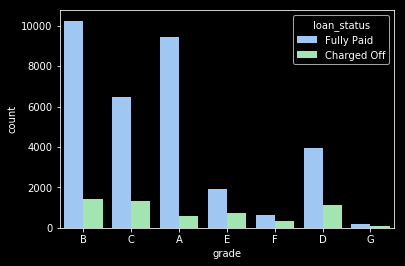

In [71]:
sns.countplot(x="grade",hue="loan_status", data = loan_4,palette="pastel")

In [79]:
print(loan_4.loc[loan_4['loan_status']=='Charged Off',"grade"].value_counts()/len(loan_4[loan_4['loan_status']=='Charged Off'].index)*100)
print(loan_4.loc[loan_4['loan_status']=='Fully Paid',"grade"].value_counts()/len(loan_4[loan_4['loan_status']=='Fully Paid'].index)*100)

B    25.396543
C    23.935127
D    19.871681
E    12.671538
A    10.728925
F     5.631795
G     1.764391
Name: grade, dtype: float64
B    31.136833
A    28.688176
C    19.677361
D    12.012395
E     5.896828
F     1.986876
G     0.601531
Name: grade, dtype: float64


We can clearly see that percentage of Charged off are greater than Fully paid in below Grades:

C,D,E,F,G

While percentage of Fully paid is greater in:

A and B

term  loan_status
36    Charged Off     3214
      Fully Paid     25835
60    Charged Off     2397
      Fully Paid      7081
Name: id, dtype: int64


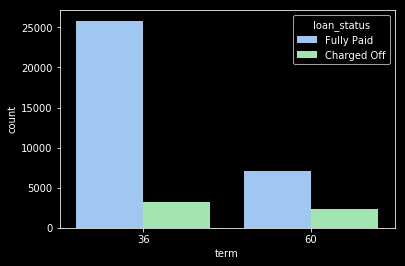

In [72]:
print(loan_4.groupby(['term','loan_status'])['id'].agg('count'))
sns.countplot(x="term", hue="loan_status", data = loan_4,palette="pastel")

In [80]:
print(loan_4.loc[loan_4['loan_status']=='Charged Off',"term"].value_counts()/len(loan_4[loan_4['loan_status']=='Charged Off'].index)*100)
print(loan_4.loc[loan_4['loan_status']=='Fully Paid',"term"].value_counts()/len(loan_4[loan_4['loan_status']=='Fully Paid'].index)*100)

36    57.280342
60    42.719658
Name: term, dtype: float64
36    78.487666
60    21.512334
Name: term, dtype: float64


Higher % of charged off in 60 Month term and Higher % of Fully paid in 36 Month Term

In [73]:
Loand_group_table = loan_4.groupby(['loan_status','verification_status'])['loan_amnt'].agg('sum')
Loand_group_table

loan_status  verification_status
Charged Off  Not Verified            18545925
             Source Verified         15307950
             Verified                34171400
Fully Paid   Not Verified           121339050
             Source Verified         81131875
             Verified               155430000
Name: loan_amnt, dtype: int64

In [81]:
print(loan_4.loc[loan_4['loan_status']=='Charged Off',"verification_status"].value_counts()/len(loan_4[loan_4['loan_status']=='Charged Off'].index)*100)
print(loan_4.loc[loan_4['loan_status']=='Fully Paid',"verification_status"].value_counts()/len(loan_4[loan_4['loan_status']=='Fully Paid'].index)*100)

Not Verified       38.050258
Verified           36.446266
Source Verified    25.503475
Name: verification_status, dtype: float64
Not Verified       44.142666
Verified           30.839106
Source Verified    25.018228
Name: verification_status, dtype: float64


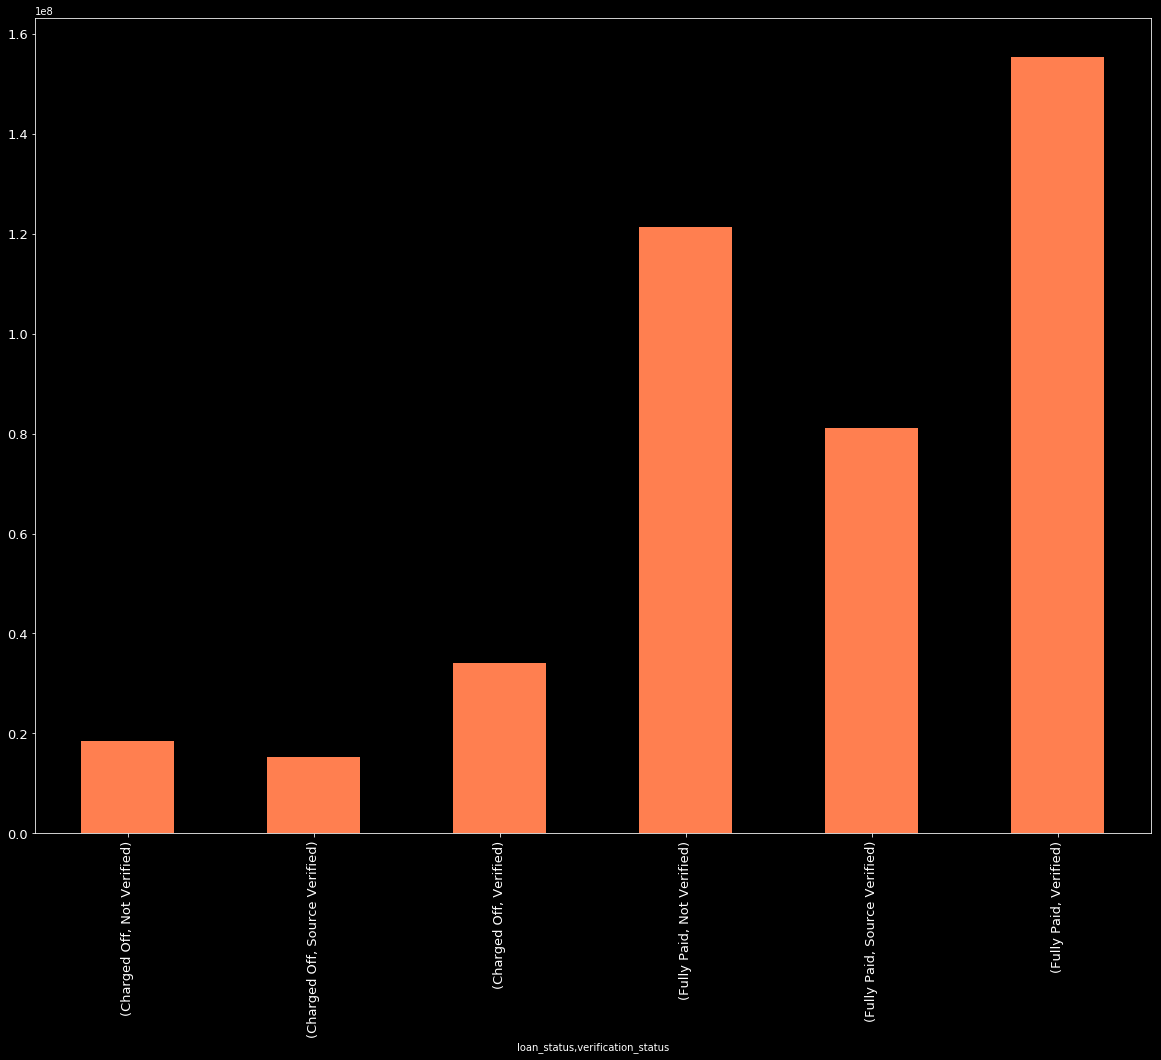

In [74]:
Loand_group_table.plot(kind = 'bar',color = "coral",figsize = (20,15), fontsize = 13)

In [75]:
loan_4.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies', 'year',
       'Interest_Rates_Slab', 'Emp_Exp_Slab', 'loan_condition', 'region',
       'complete_date'],
      dtype='object')

In [76]:
Loand_group_table_by_grade = loan_4.groupby(['loan_status','grade'])['loan_amnt'].agg('sum')
Loand_group_table_by_grade

loan_status  grade
Charged Off  A          4695550
             B         15540725
             C         14858600
             D         13628200
             E         11323925
             F          6128450
             G          1849825
Fully Paid   A         81879875
             B        112117275
             C         69813750
             D         48021225
             E         30385975
             F         11500000
             G          4182825
Name: loan_amnt, dtype: int64

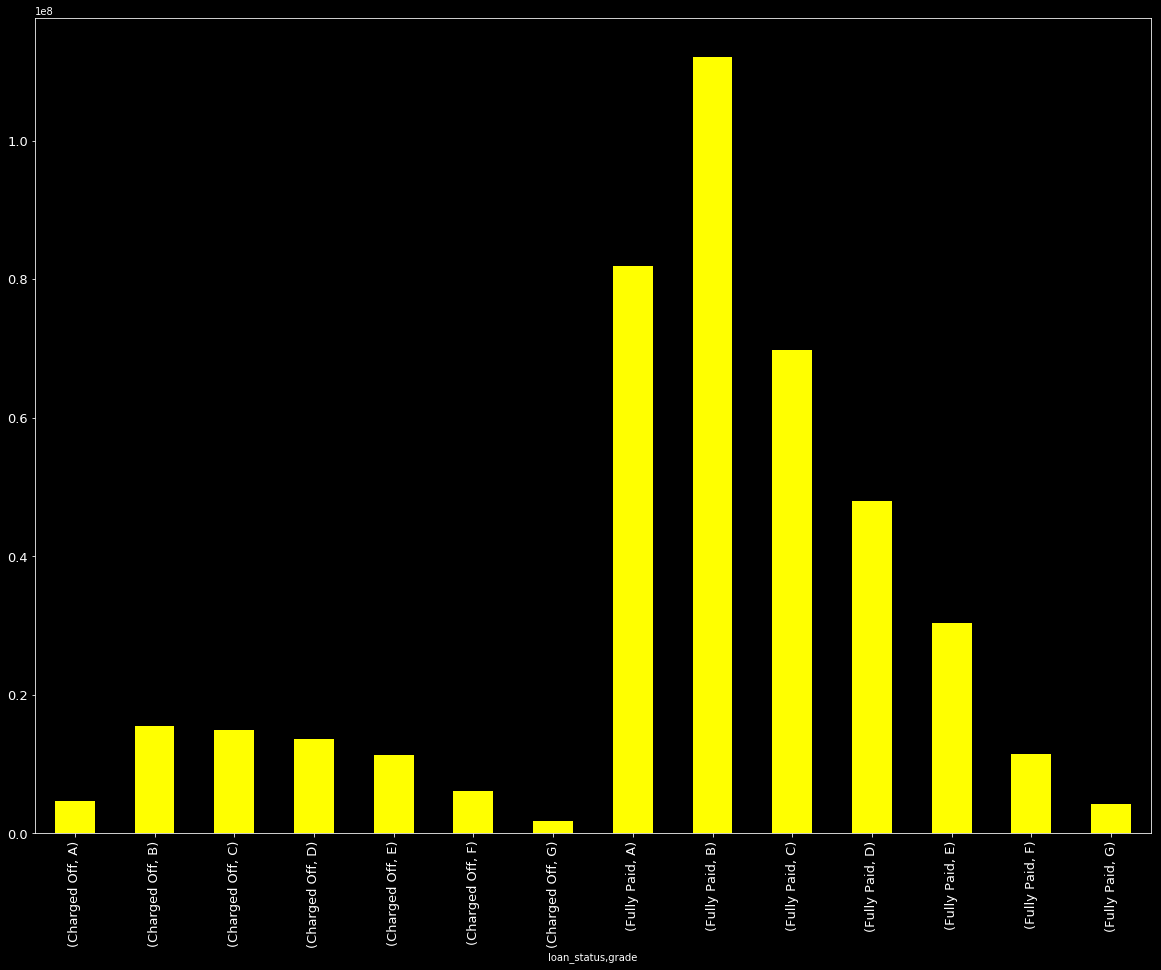

In [77]:
Loand_group_table_by_grade.plot(kind = 'bar',color = "yellow",figsize = (20,15), fontsize = 13)

In [83]:
# Number of months since delq:
print(loan_4.loc[loan_4['loan_status']=='Charged Off',"last_delinq_slab"].value_counts()/len(loan_4[loan_4['loan_status']=='Charged Off'].index)*100)
print(loan_4.loc[loan_4['loan_status']=='Fully Paid',"last_delinq_slab"].value_counts()/len(loan_4[loan_4['loan_status']=='Fully Paid'].index)*100)

No record    61.914097
Old          23.970772
2Year         8.216004
12Month       3.118874
Recent        2.780253
Name: last_delinq_slab, dtype: float64
No record    64.995747
Old          22.627294
2Year         7.096853
12Month       2.694738
Recent        2.585369
Name: last_delinq_slab, dtype: float64


In [84]:
set1 = pd.DataFrame(loan_4.loc[loan_4['loan_status']=='Charged Off',"last_delinq_slab"].value_counts()/len(loan_4[loan_4['loan_status']=='Charged Off'].index)*100)
set2 = pd.DataFrame(loan_4.loc[loan_4['loan_status']=='Fully Paid',"last_delinq_slab"].value_counts()/len(loan_4[loan_4['loan_status']=='Fully Paid'].index)*100)

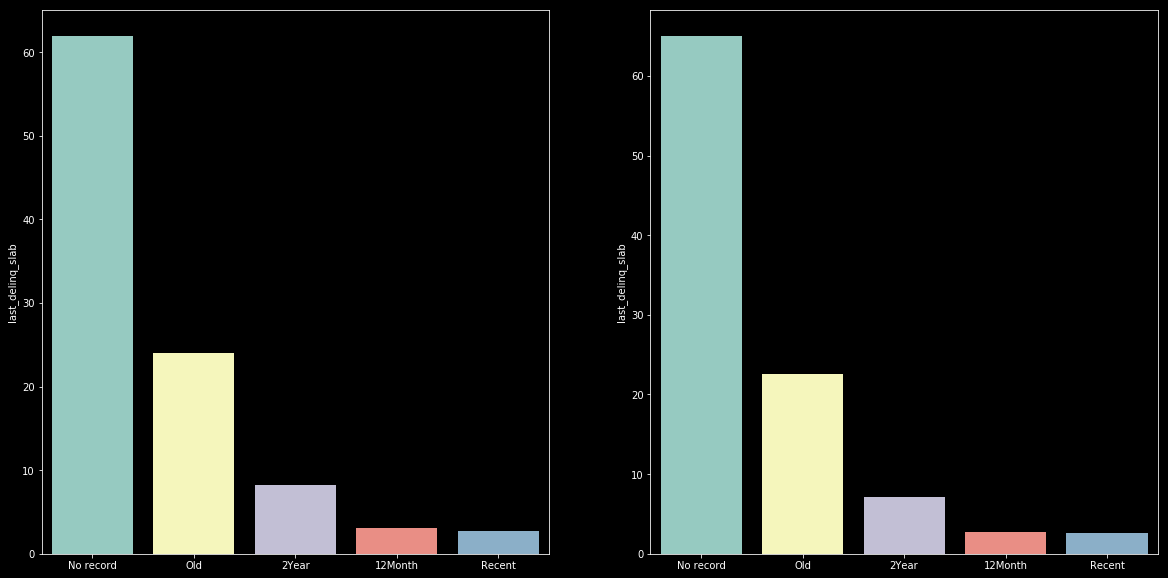

In [88]:
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(x=set1.index,y='last_delinq_slab',data=set1)

plt.subplot(1,2,2)
sns.barplot(x=set2.index,y='last_delinq_slab',data=set2)

Where there is no Delinquency recorded, % of Fully Paid Customers is higher than Charged off.

In [90]:
# On Revolving utilization:
print(loan_4.loc[loan_4['loan_status']=='Charged Off',"revol_util_slab"].value_counts()/len(loan_4[loan_4['loan_status']=='Charged Off'].index)*100)
print(loan_4.loc[loan_4['loan_status']=='Fully Paid',"revol_util_slab"].value_counts()/len(loan_4[loan_4['loan_status']=='Fully Paid'].index)*100)

High         29.691677
Very High    29.656033
Medium       23.632151
Low          17.020139
Name: revol_util_slab, dtype: float64
Medium       26.655730
High         26.291165
Low          26.096731
Very High    20.956374
Name: revol_util_slab, dtype: float64


In [91]:
set3 = pd.DataFrame(loan_4.loc[loan_4['loan_status']=='Charged Off',"revol_util_slab"].value_counts()/len(loan_4[loan_4['loan_status']=='Charged Off'].index)*100)
set4 = pd.DataFrame(loan_4.loc[loan_4['loan_status']=='Fully Paid',"revol_util_slab"].value_counts()/len(loan_4[loan_4['loan_status']=='Fully Paid'].index)*100)

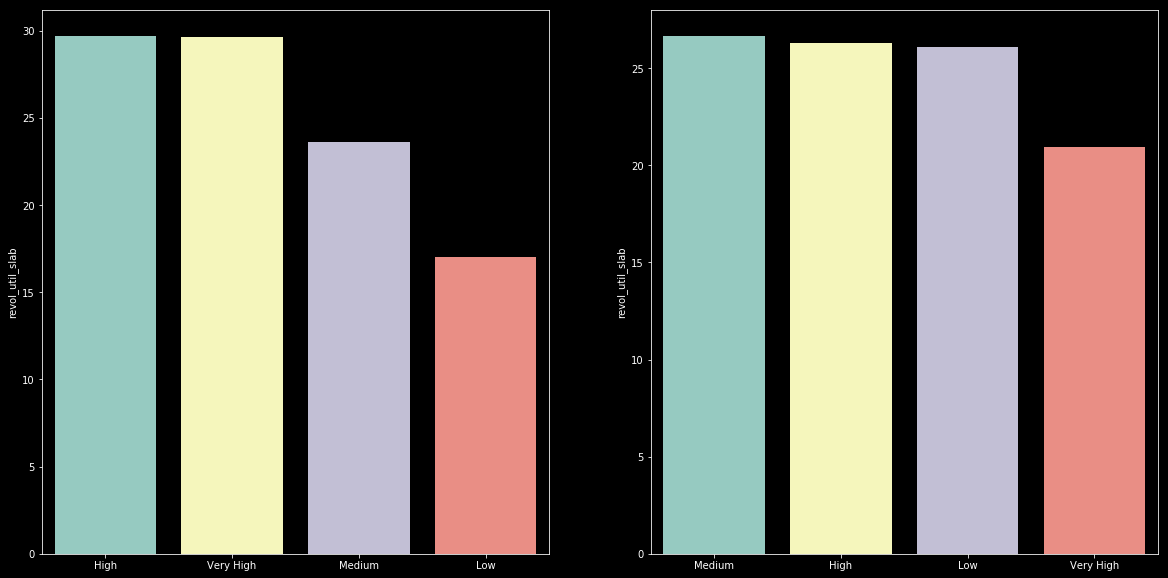

In [93]:
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(x=set3.index,y='revol_util_slab',data=set3)

plt.subplot(1,2,2)
sns.barplot(x=set4.index,y='revol_util_slab',data=set4)

Charged Off % is higher for:Very High and High Utilisation rate.
Fully Paid % is higher for:Low and Medium Utilisation rate.

In [95]:
# On number of enquiries:
print(loan_4.loc[loan_4['loan_status']=='Charged Off',"inq_slab"].value_counts()/len(loan_4[loan_4['loan_status']=='Charged Off'].index)*100)
print(loan_4.loc[loan_4['loan_status']=='Fully Paid',"inq_slab"].value_counts()/len(loan_4[loan_4['loan_status']=='Fully Paid'].index)*100)

Low          87.078952
Medium       11.905186
High          0.784174
Very High     0.231688
Name: inq_slab, dtype: float64
Low          91.414510
Medium        7.983959
High          0.495200
Very High     0.106331
Name: inq_slab, dtype: float64


In [96]:
set5 = pd.DataFrame(loan_4.loc[loan_4['loan_status']=='Charged Off',"inq_slab"].value_counts()/len(loan_4[loan_4['loan_status']=='Charged Off'].index)*100)
set6 = pd.DataFrame(loan_4.loc[loan_4['loan_status']=='Fully Paid',"inq_slab"].value_counts()/len(loan_4[loan_4['loan_status']=='Fully Paid'].index)*100)

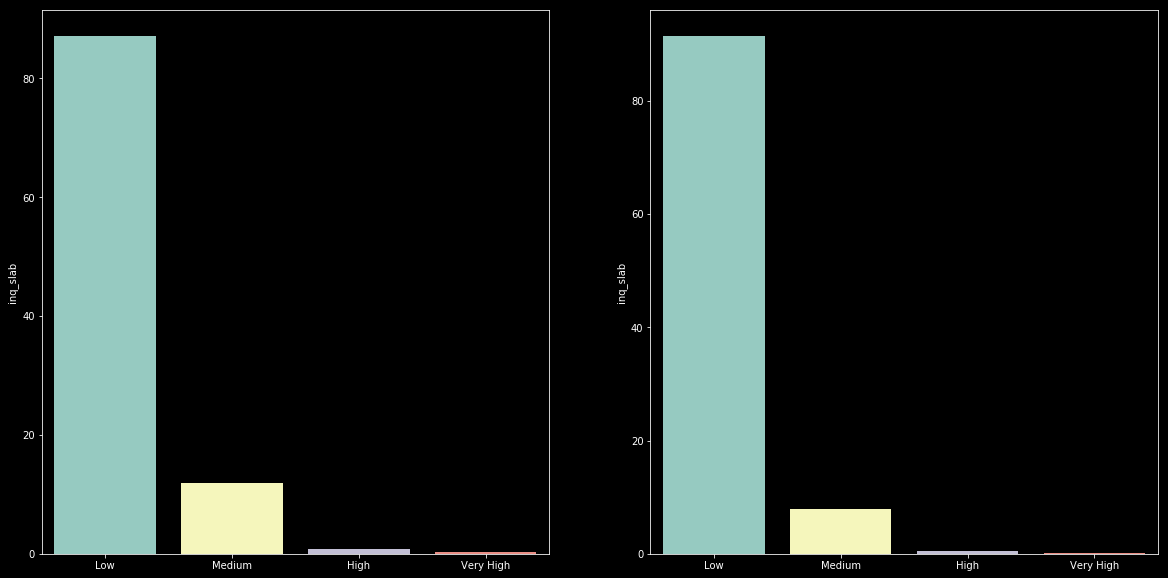

In [97]:
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(x=set5.index,y='inq_slab',data=set5)

plt.subplot(1,2,2)
sns.barplot(x=set6.index,y='inq_slab',data=set6)